In [1]:
import matplotlib.pyplot as plt
import xarray
import numpy as np
%matplotlib inline

#Datenimport und Konsolidierung
data = xarray.open_dataset('C:/Users/PfitznerD/Desktop/Studium/WS20_21/Angew.Sys2/Gruppenprojekt/d50mm_year.nc')
tas = data.d50mm
tast = tas.transpose('time','latitude', 'longitude')

In [2]:
#Slice für 30-Jahresperioden
tas_clim = tast.sel(time=slice('1971-01-01','2000-12-31')).mean()
tas_clim_stm = tast.sel(time=slice('1971-01-01','2000-12-31')).mean(dim='time').sel(longitude=slice(15.41583),latitude=slice(47.10972))

#Berechnung Anomalie
tas_anom = (tast - tas_clim)
tas_anom_stm = (tast - tas_clim_stm)

#30-Jahres-Durchschnittstemperaturen für SO-STM und Europa
print(tas_clim)
print(tas_clim_stm.mean())

<xarray.DataArray 'd50mm' ()>
array(0.14674716, dtype=float32)
<xarray.DataArray 'd50mm' ()>
array(0.42502722, dtype=float32)


In [3]:
#Jahresdurchschnitt für jedes Jahr der gesamten Datenreihe seit 1970
tas_anom_yearly = tas_anom.sel(time=slice('1970-01-01',None)).resample(time='Y').mean(dim='time')
tas_anom_yearly_stm = tas_anom_stm.sel(time=slice('1970-01-01',None)).resample(time='Y').mean(dim='time')

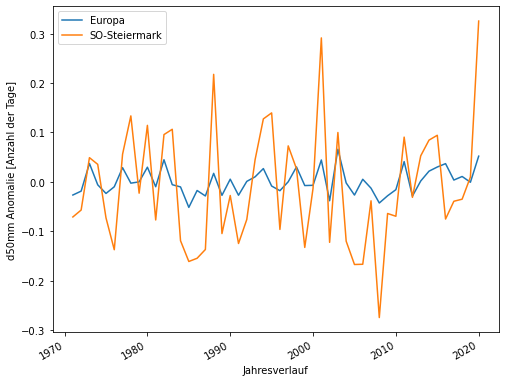

In [5]:
#Erstelle Grafik
axes = plt.axes()
axes.figure.set_size_inches(8, 6)
tas_anom_yearly.mean(dim=('latitude','longitude')).plot(ax=axes, label='Europa')
tas_anom_yearly_stm.mean(dim=('latitude','longitude')).plot(ax=axes, label='SO-Steiermark')

#plt.title('Heavy precipitation days anomalies from a 1971-2000 climatology')
plt.ylabel('d50mm Anomalie [Anzahl der Tage]')
plt.xlabel('Jahresverlauf')
plt.legend()

#plt.savefig('d50mm.png')